# Onramp Data Engineering Project

### Importing Packages

In [4]:
# pulling data from spotify
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials

# viewing data samples
import pprint

# building dataframes
import pandas as pd

# testing resource use
import timeit
%load_ext memory_profiler

### Using spofity app creditentials storted in system setting

In [5]:
auth_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(auth_manager=auth_manager)

## Section 1: Requesting the data

### Creating a list of favorite artists

In [189]:
search_artists = ["Wild Child", "Tessa Violet", "Halsey", "OK Go",
                  "Regina Spektor", "Modest Mouse", "The Killers",
                  "the GazettE", "Dolly Parton", "Ed Sheeran",
                  "The Vaccines", "Bloc Party", "Simple Plan",
                  "Creedence Clearwater Revival", "Miike Snow",
                  "Adele", "Grace VanderWaal", "Fall Out Boy",
                  "blink-182", "Taylor Swift"]

### Creating a list of columns for each of the tables

In [190]:
# df_artist
artist_table_columns = ['artist_id', 'artist_name', 'external_url', 
                        'genre', 'image_url', 'followers', 'popularity', 
                        'type', 'artist_uri']

# df_album
album_table_columns = ['album_id', 'album_name', 'external_url', 
                       'image_url', 'release_date', 'total_tracks', 
                       'type', 'album_uri', 'artist_id']

# df_track
track_table_columns = ['track_id', 'song_name', 'external_url', 'duration_ms', 
                       'explicit', 'disc_number', 'type', 'song_uri', 'album_id']

# df_track_feature
track_feature_table_columns = ['track_id', 'danceability', 'energy', 
                               'instrumentalness', 'liveness', 'loudness', 
                               'speechiness', 'tempo', 'type', 'valence', 'song_uri']

In [191]:
df_artist = pd.DataFrame(columns = artist_table_columns)
df_album = pd.DataFrame(columns = album_table_columns)
df_track = pd.DataFrame(columns = track_table_columns)
df_track_feature = pd.DataFrame(columns = track_feature_table_columns)

## 1.1 Pulling Sample Data
I will pull a sample of the data for each data table using the spotipy package. This will be usefull for building the functions that will populate the dataframes. The pprint package will be useful for this since it will make the pulled data much easier to read.

### 1.1.1 Artist data sample

In [192]:
# only pulling the first result because I do not want potentially multiple artists with the same name
# testing the connection and printing out any errors with an excetpion statement
try: 
    pprint.pprint(sp.search(q="Wild Child", type="artist")['artists']['items'][0])
except Exception as e:
    print(e)

{'external_urls': {'spotify': 'https://open.spotify.com/artist/1xLMexpeeTKQ20SwGMaGSK'},
 'followers': {'href': None, 'total': 144722},
 'genres': ['austin americana',
            'austindie',
            'deep new americana',
            'folk-pop',
            'indie folk',
            'new americana',
            'stomp and holler'],
 'href': 'https://api.spotify.com/v1/artists/1xLMexpeeTKQ20SwGMaGSK',
 'id': '1xLMexpeeTKQ20SwGMaGSK',
 'images': [{'height': 640,
             'url': 'https://i.scdn.co/image/ab6761610000e5eb4d4c9f66cfdd382224ce68f2',
             'width': 640},
            {'height': 320,
             'url': 'https://i.scdn.co/image/ab676161000051744d4c9f66cfdd382224ce68f2',
             'width': 320},
            {'height': 160,
             'url': 'https://i.scdn.co/image/ab6761610000f1784d4c9f66cfdd382224ce68f2',
             'width': 160}],
 'name': 'Wild Child',
 'popularity': 52,
 'type': 'artist',
 'uri': 'spotify:artist:1xLMexpeeTKQ20SwGMaGSK'}


### 1.1.2 Album Data Sample

In [193]:
pprint.pprint(sp.artist_albums('1xLMexpeeTKQ20SwGMaGSK', album_type='album')['items'][0:3])

[{'album_group': 'album',
  'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1xLMexpeeTKQ20SwGMaGSK'},
               'href': 'https://api.spotify.com/v1/artists/1xLMexpeeTKQ20SwGMaGSK',
               'id': '1xLMexpeeTKQ20SwGMaGSK',
               'name': 'Wild Child',
               'type': 'artist',
               'uri': 'spotify:artist:1xLMexpeeTKQ20SwGMaGSK'}],
  'available_markets': ['AD',
                        'AE',
                        'AG',
                        'AL',
                        'AM',
                        'AO',
                        'AR',
                        'AT',
                        'AU',
                        'AZ',
                        'BA',
                        'BB',
                        'BD',
                        'BE',
                        'BF',
                        'BG',
                        'BH',
                        'BI',
                        'BJ',
          

There may be an issue with duplication for the albums. The first three albums from the data pull all have the same name, release date and number of tracks. However, there is a difference in the regions that is was released in. This should be taken into account when pulling the data. 

### 1.1.3 Track Data

In [194]:
pprint.pprint(sp.album_tracks('1RYP4jpaZn8uKR2HLSPLWm')['items'][0])

{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1xLMexpeeTKQ20SwGMaGSK'},
              'href': 'https://api.spotify.com/v1/artists/1xLMexpeeTKQ20SwGMaGSK',
              'id': '1xLMexpeeTKQ20SwGMaGSK',
              'name': 'Wild Child',
              'type': 'artist',
              'uri': 'spotify:artist:1xLMexpeeTKQ20SwGMaGSK'}],
 'available_markets': ['AD',
                       'AE',
                       'AG',
                       'AL',
                       'AM',
                       'AO',
                       'AR',
                       'AT',
                       'AU',
                       'AZ',
                       'BA',
                       'BB',
                       'BD',
                       'BE',
                       'BF',
                       'BG',
                       'BH',
                       'BI',
                       'BJ',
                       'BN',
                       'BO',
                       'BR',

1.1.4 Track Feature Data

In [195]:
pprint.pprint(sp.audio_features('3y5gxbKqif7iw5brilMqEi')[0])

{'acousticness': 0.572,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3y5gxbKqif7iw5brilMqEi',
 'danceability': 0.624,
 'duration_ms': 176027,
 'energy': 0.718,
 'id': '3y5gxbKqif7iw5brilMqEi',
 'instrumentalness': 5.29e-05,
 'key': 9,
 'liveness': 0.295,
 'loudness': -8.642,
 'mode': 1,
 'speechiness': 0.0616,
 'tempo': 160.047,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/3y5gxbKqif7iw5brilMqEi',
 'type': 'audio_features',
 'uri': 'spotify:track:3y5gxbKqif7iw5brilMqEi',
 'valence': 0.624}


# Section 2 Populating dataframes

## 2.1 Populating df_artist

In this section I am going to create a function to pull all of the information for the 20 artists that I selected. I will confirm that all of the artist made it into the final data frame and thatall of the data matches the same format given in the original prompt. I am also going to try two ways of pulling the data and test them for efficiency.


In [196]:
def artist_data_pull(artist_list):

    for artist in artist_list:

        # Requesting results for each artist in list where type is "artist"
        result = sp.search(q=artist, type="artist")

        # Selecting all data within 'items' in the pulled data
        item = result['artists']['items']
        #print(item)

        # Creating a list of required data to enter into artist_df
        new_row = [item[0]['id'], # artist id
                   item[0]['name'], # artist name
                   item[0]['external_urls']['spotify'], # external url
                   item[0]['genres'][0], # selecting the first genres
                   item[0]['images'][0]['url'], # selesction the first image
                   item[0]['followers']['total'], # followers
                   item[0]['popularity'], # populatrity
                   item[0]['type'], # type
                   item[0]['uri']] # artist uri

        # Inserting pulled data into last row of artist_df
        df_artist.loc[len(df_artist.index)] = new_row


In [197]:
# testing the first method where data is entered into the dataframe line by line
%timeit artist_data_pull(search_artists)
%memit artist_data_pull(search_artists)

2.22 s ± 155 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
peak memory: 365.71 MiB, increment: 0.00 MiB


In [198]:
# clearing out the dataframe so that if the function is run again, duplicates are not added
df_artist = pd.DataFrame(columns = artist_table_columns)
artist_data_pull(search_artists)

Testing another variation with a data dictionary. I will compare resources used to decide on the final method to pull and temporarily store data.

In [199]:
# creating an artist dictionary to store the artist data
artist_dict = {}

# creating lists for column of the artist relation
artist_id_list    = []
artist_name_list  = []
external_url_list = []
genre_list        = []
image_url_list    = []
follower_list     = []
popularity_list   = []
artist_type_list  = []
artist_uri_list   = []

In [200]:
# Populating artist dataframe with dictionary
def pop_artist(artist_list):
    for artist in artist_list:
        results = sp.search(artist, limit=1, type='artist')
        item = results['artists']['items'][0]
        
        # populating the artist info lists
        artist_id_list.append(item['id'])
        artist_name_list.append(item['name'])
        external_url_list.append(item['external_urls']['spotify'])
        genre_list.append(item['genres'][0])
        image_url_list.append(item['images'][0]['url'])
        follower_list.append(item['followers']['total'])
        popularity_list.append(item['popularity'])
        artist_type_list.append(item['type'])
        artist_uri_list.append(item['uri'])

    # adding the lists to the dictionary
    artist_dict['artist_id'] = artist_id_list
    artist_dict['artist_name'] = artist_name_list
    artist_dict['external_url'] = external_url_list
    artist_dict['genre'] = genre_list
    artist_dict['image_url'] = image_url_list
    artist_dict['followers'] = follower_list
    artist_dict['popularity'] = popularity_list
    artist_dict['type'] = artist_type_list
    artist_dict['artist_uri'] = artist_uri_list

In [201]:
# testing the second method where a dictionary is used to build a dataframe
%timeit pop_artist(search_artists)
%memit pop_artist(search_artists)

2.27 s ± 390 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
peak memory: 365.73 MiB, increment: 0.00 MiB


Both methods yield very similar results for both time and memory resources consumed. Within the margin of error, either solution is consistant with each other. 

In [202]:
df_artist.head()

,artist_id,artist_name,external_url,genre,image_url,followers,popularity,type,artist_uri
0,1xLMexpeeTKQ20SwGMaGSK,Wild Child,https://open.spotify.com/artist/1xLMexpeeTKQ20...,austin americana,https://i.scdn.co/image/ab6761610000e5eb4d4c9f...,144722,52,artist,spotify:artist:1xLMexpeeTKQ20SwGMaGSK
1,5DD5GZd4ElmQTy9NleMvKJ,Tessa Violet,https://open.spotify.com/artist/5DD5GZd4ElmQTy...,alt z,https://i.scdn.co/image/ab6761610000e5eb7cc0d7...,647681,57,artist,spotify:artist:5DD5GZd4ElmQTy9NleMvKJ
2,26VFTg2z8YR0cCuwLzESi2,Halsey,https://open.spotify.com/artist/26VFTg2z8YR0cC...,dance pop,https://i.scdn.co/image/ab6761610000e5ebd707e1...,18395359,83,artist,spotify:artist:26VFTg2z8YR0cCuwLzESi2
3,3hozsZ9hqNq7CoBGYNlFTz,OK Go,https://open.spotify.com/artist/3hozsZ9hqNq7Co...,alternative rock,https://i.scdn.co/image/0cf0e41aef321054144f04...,483653,56,artist,spotify:artist:3hozsZ9hqNq7CoBGYNlFTz
4,3z6Gk257P9jNcZbBXJNX5i,Regina Spektor,https://open.spotify.com/artist/3z6Gk257P9jNcZ...,indie pop,https://i.scdn.co/image/ab6761610000e5eba36a9f...,1294696,62,artist,spotify:artist:3z6Gk257P9jNcZbBXJNX5i


In [203]:
df_artist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   artist_id     20 non-null     object
 1   artist_name   20 non-null     object
 2   external_url  20 non-null     object
 3   genre         20 non-null     object
 4   image_url     20 non-null     object
 5   followers     20 non-null     object
 6   popularity    20 non-null     object
 7   type          20 non-null     object
 8   artist_uri    20 non-null     object
dtypes: object(9)
memory usage: 1.6+ KB


#### Remarks on df_artist
All of the artists that I selected are in the dataframe. Additionally none of the values are nulls or duplicates. I can also confirm that only the first genre was selected, not the entire list for each artist. However, both followers and popularity are listed as type object instead of INT. This will need to be addressed in the transformation phase.

## 2.2 Populating album dataframe
To request data for the albums I created a list of all of the artist's ids and I will iterate over those to search for all albums. For the results of each album, I will go through each album, adding the required information to the album dataframe, one row at a time.

In [204]:
def pull_artist_albums(artist_ids):

    for artist_id in artist_ids:
        # Requesting results for each artist_id in list where type is "album"
        results = sp.artist_albums(artist_id, album_type='album', country='US')

        # Selecting all data within 'items' in the pulled data
        items = results['items']

        # Pulling all of the albums from the artist
        for i in range(len(items)):
            new_row = [items[i]['id'],  # alumb id
                       items[i]['name'],  # album name
                       items[i]['external_urls']['spotify'],  # external url
                       items[i]['images'][0]['url'],  # first image result
                       items[i]['release_date'],  # release date
                       items[i]['total_tracks'],  # number of tracks
                       items[i]['type'],  # album type
                       items[i]['uri'],  # album uri
                       artist_id]  # artist id

            # Inserting pulled data into last row of album_df
            df_album.loc[len(df_album.index)] = new_row

In [205]:
# make sure the most up-to-date list of artist ids is used
artist_ids = df_artist["artist_id"].to_list()

# start with an empty dataframe
df_album = pd.DataFrame(columns = album_table_columns)

# run the function to populate the album dataframe
pull_artist_albums(artist_ids)

Looking at the first five rows of the album dataframe to insure that they are in the same format and data type as expected.

In [206]:
df_album.head()

,album_id,album_name,external_url,image_url,release_date,total_tracks,type,album_uri,artist_id
0,1RYP4jpaZn8uKR2HLSPLWm,Expectations,https://open.spotify.com/album/1RYP4jpaZn8uKR2...,https://i.scdn.co/image/ab67616d0000b27305c904...,2018-02-09,12,album,spotify:album:1RYP4jpaZn8uKR2HLSPLWm,1xLMexpeeTKQ20SwGMaGSK
1,55ld4JYzuogsLO2utQ1VHk,Fools,https://open.spotify.com/album/55ld4JYzuogsLO2...,https://i.scdn.co/image/ab67616d0000b273a7784a...,2015-10-02,12,album,spotify:album:55ld4JYzuogsLO2utQ1VHk,1xLMexpeeTKQ20SwGMaGSK
2,7syMxc0OltBTOi0bzUdsyL,The Runaround,https://open.spotify.com/album/7syMxc0OltBTOi0...,https://i.scdn.co/image/ab67616d0000b273c4cc3a...,2015-05-19,11,album,spotify:album:7syMxc0OltBTOi0bzUdsyL,1xLMexpeeTKQ20SwGMaGSK
3,6PPFActErBg9LwXfMfOKYB,Pillow Talk,https://open.spotify.com/album/6PPFActErBg9LwX...,https://i.scdn.co/image/ab67616d0000b273391ba4...,2011-10-25,15,album,spotify:album:6PPFActErBg9LwXfMfOKYB,1xLMexpeeTKQ20SwGMaGSK
4,39y7WSuhOKLmxWP7ElwWFl,Bad Ideas,https://open.spotify.com/album/39y7WSuhOKLmxWP...,https://i.scdn.co/image/ab67616d0000b273691253...,2019-10-25,11,album,spotify:album:39y7WSuhOKLmxWP7ElwWFl,5DD5GZd4ElmQTy9NleMvKJ


In [207]:
df_album.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 228
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   album_id      229 non-null    object
 1   album_name    229 non-null    object
 2   external_url  229 non-null    object
 3   image_url     229 non-null    object
 4   release_date  229 non-null    object
 5   total_tracks  229 non-null    object
 6   type          229 non-null    object
 7   album_uri     229 non-null    object
 8   artist_id     229 non-null    object
dtypes: object(9)
memory usage: 17.9+ KB


There are 303 different albums from the 20 artists. A possible issue can be seen from just looking at the head of the dataframe. As seen in section 1, there are three entries for the album "Expectations" by Wild Child. 
</br>
</br>
This also brings up a good point, that there are other possible "duplicates" such as remixes, that may also lie in the data. Now would be a good time to remove duplicates so that exttra time and resources are not used to pull the track information for those albums.
</br>
</br>
For the data transformation, total_tracks will need to be changed to INT and release_date to DATE.


### 2.2.1 Removing duplicate albums

In [208]:
df_album_dup = df_album[df_album["album_name"].duplicated()]

In [209]:
df_album_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 8 to 221
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   album_id      29 non-null     object
 1   album_name    29 non-null     object
 2   external_url  29 non-null     object
 3   image_url     29 non-null     object
 4   release_date  29 non-null     object
 5   total_tracks  29 non-null     object
 6   type          29 non-null     object
 7   album_uri     29 non-null     object
 8   artist_id     29 non-null     object
dtypes: object(9)
memory usage: 2.3+ KB


The number of albums that have duplicated names it 91. Let's drop those from our original album dataframe

In [210]:
df_album_nodup = df_album.drop_duplicates(subset=['album_name'])
df_album_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 228
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   album_id      200 non-null    object
 1   album_name    200 non-null    object
 2   external_url  200 non-null    object
 3   image_url     200 non-null    object
 4   release_date  200 non-null    object
 5   total_tracks  200 non-null    object
 6   type          200 non-null    object
 7   album_uri     200 non-null    object
 8   artist_id     200 non-null    object
dtypes: object(9)
memory usage: 15.6+ KB


The duplicated albums have been removed.

Next I will remove all alumbs that have names containing "remix", "edition" and other similar words that suggest that they are a duplicate or copy of the original.


In [211]:
# removing albums with these key words in the name
to_remove = ['Remix', 'remix', 'Version', 'version', 'Delux', 'Edition', 'Live', 'Mix', 'Tour', 'Remaster', 'Anthology']
for words in to_remove:
    df_album_nodup = df_album_nodup[df_album_nodup["album_name"].str.contains(words) == False]
    
df_album_nodup

,album_id,album_name,external_url,image_url,release_date,total_tracks,type,album_uri,artist_id
0,1RYP4jpaZn8uKR2HLSPLWm,Expectations,https://open.spotify.com/album/1RYP4jpaZn8uKR2...,https://i.scdn.co/image/ab67616d0000b27305c904...,2018-02-09,12,album,spotify:album:1RYP4jpaZn8uKR2HLSPLWm,1xLMexpeeTKQ20SwGMaGSK
1,55ld4JYzuogsLO2utQ1VHk,Fools,https://open.spotify.com/album/55ld4JYzuogsLO2...,https://i.scdn.co/image/ab67616d0000b273a7784a...,2015-10-02,12,album,spotify:album:55ld4JYzuogsLO2utQ1VHk,1xLMexpeeTKQ20SwGMaGSK
2,7syMxc0OltBTOi0bzUdsyL,The Runaround,https://open.spotify.com/album/7syMxc0OltBTOi0...,https://i.scdn.co/image/ab67616d0000b273c4cc3a...,2015-05-19,11,album,spotify:album:7syMxc0OltBTOi0bzUdsyL,1xLMexpeeTKQ20SwGMaGSK
3,6PPFActErBg9LwXfMfOKYB,Pillow Talk,https://open.spotify.com/album/6PPFActErBg9LwX...,https://i.scdn.co/image/ab67616d0000b273391ba4...,2011-10-25,15,album,spotify:album:6PPFActErBg9LwXfMfOKYB,1xLMexpeeTKQ20SwGMaGSK
4,39y7WSuhOKLmxWP7ElwWFl,Bad Ideas,https://open.spotify.com/album/39y7WSuhOKLmxWP...,https://i.scdn.co/image/ab67616d0000b273691253...,2019-10-25,11,album,spotify:album:39y7WSuhOKLmxWP7ElwWFl,5DD5GZd4ElmQTy9NleMvKJ
...,...,...,...,...,...,...,...,...,...
223,1MHuZZrGT36cXLxAQ5cLP3,Taylor Swift Karaoke: reputation,https://open.spotify.com/album/1MHuZZrGT36cXLx...,https://i.scdn.co/image/ab67616d0000b27305fd69...,2018-03-09,15,album,spotify:album:1MHuZZrGT36cXLxAQ5cLP3,06HL4z0CvFAxyc27GXpf02
224,6DEjYFkNZh67HP7R9PSZvv,reputation,https://open.spotify.com/album/6DEjYFkNZh67HP7...,https://i.scdn.co/image/ab67616d0000b273da5d5a...,2017-11-10,15,album,spotify:album:6DEjYFkNZh67HP7R9PSZvv,06HL4z0CvFAxyc27GXpf02
225,1Hrs3jLGexOvBoaPMoOQYJ,reputation (Big Machine Radio Release Special),https://open.spotify.com/album/1Hrs3jLGexOvBoa...,https://i.scdn.co/image/ab67616d0000b273727a2e...,2017-11-10,31,album,spotify:album:1Hrs3jLGexOvBoaPMoOQYJ,06HL4z0CvFAxyc27GXpf02
227,2QJmrSgbdM35R67eoGQo4j,1989,https://open.spotify.com/album/2QJmrSgbdM35R67...,https://i.scdn.co/image/ab67616d0000b2739abdf1...,2014-10-27,13,album,spotify:album:2QJmrSgbdM35R67eoGQo4j,06HL4z0CvFAxyc27GXpf02


## 2.3 Populating track dataframe
To retrieve all of the tracks from the albums in df_albums, a list of the album ids was created and the album tracks function from the spotipy package was used. For each album, each result was iterated over to pull all of the necessary track information. The information was stored in the track dataframe.

In [212]:
def get_tracks(album_ids):
    """ This function searches for the artists name given that
    was given as an argument and returns the first result. If there
    are no result, nothing is returned"""
    for album_id in album_ids:
        results = sp.album_tracks(album_id)
        # Selecting all data within 'items' in the pulled data
        item = results['items']
        
        for i in range(len(item)):
            new_row = [item[i]['uri'], item[i]['name'], item[i]['external_urls']['spotify'],
            item[i]['duration_ms'], item[i]['explicit'], item[i]['disc_number'], item[i]['type'],
            item[i]['uri'], album_id]
            

            # Inserting pulled data into last row of track_df
            df_track.loc[len(df_track.index)] = new_row


In [213]:
album_ids = df_album_nodup["album_id"].to_list()

# start with an empty dataframe
df_track = pd.DataFrame(columns = track_table_columns)
get_tracks(album_ids)

In [214]:
df_track.head()

,track_id,song_name,external_url,duration_ms,explicit,disc_number,type,song_uri,album_id
0,spotify:track:3y5gxbKqif7iw5brilMqEi,Alex,https://open.spotify.com/track/3y5gxbKqif7iw5b...,176026,False,1,track,spotify:track:3y5gxbKqif7iw5brilMqEi,1RYP4jpaZn8uKR2HLSPLWm
1,spotify:track:7EgxWK4LlN2t73xmLnyYOK,Eggshells,https://open.spotify.com/track/7EgxWK4LlN2t73x...,309906,False,1,track,spotify:track:7EgxWK4LlN2t73xmLnyYOK,1RYP4jpaZn8uKR2HLSPLWm
2,spotify:track:21gALdjlanjYvfJs6EfvC8,Back & Forth,https://open.spotify.com/track/21gALdjlanjYvfJ...,211360,True,1,track,spotify:track:21gALdjlanjYvfJs6EfvC8,1RYP4jpaZn8uKR2HLSPLWm
3,spotify:track:4dwYda1scNOJxxEPiq6Yg2,Think It Over,https://open.spotify.com/track/4dwYda1scNOJxxE...,234880,False,1,track,spotify:track:4dwYda1scNOJxxEPiq6Yg2,1RYP4jpaZn8uKR2HLSPLWm
4,spotify:track:3vuwQU2QLKueuzXFzknXm7,Follow Me,https://open.spotify.com/track/3vuwQU2QLKueuzX...,211120,False,1,track,spotify:track:3vuwQU2QLKueuzXFzknXm7,1RYP4jpaZn8uKR2HLSPLWm


In [215]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1930 entries, 0 to 1929
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   track_id      1930 non-null   object
 1   song_name     1930 non-null   object
 2   external_url  1930 non-null   object
 3   duration_ms   1930 non-null   object
 4   explicit      1930 non-null   object
 5   disc_number   1930 non-null   object
 6   type          1930 non-null   object
 7   song_uri      1930 non-null   object
 8   album_id      1930 non-null   object
dtypes: object(9)
memory usage: 150.8+ KB


All of the data is in the format that was expected. Furthermore, there is well over the 1000 tracks required. 
</br>
</br>
For the data transformation, duration_ms will need to be changed to INT, explicit to BOOLEAN and disc_number to INT.

## 2.4 Populating df_track_features

In [216]:
track_ids = df_track["track_id"].tolist()

def get_track_info(track_ids):

    for track_id in track_ids:

        result = sp.audio_features(track_id)[0]

        try:
            new_row = [track_id, result['danceability'], result['energy'], result['instrumentalness'], 
                   result['liveness'], result['loudness'], result['speechiness'], result['tempo'], 
                   result['type'], result['valence'], result['uri']]
        except Exception as e:
            print("There was an issue with a track.")
            print(e)
        df_track_feature.loc[len(df_track_feature.index)] = new_row
        


In [217]:
# Makeing a clean dataframe to prevent duplication
df_track_feature = pd.DataFrame(columns = track_feature_table_columns)
# Populating the dataframe
get_track_info(track_ids)
df_track_feature

,track_id,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,type,valence,song_uri
0,spotify:track:3y5gxbKqif7iw5brilMqEi,0.624,0.718,0.000053,0.2950,-8.642,0.0616,160.047,audio_features,0.6240,spotify:track:3y5gxbKqif7iw5brilMqEi
1,spotify:track:7EgxWK4LlN2t73xmLnyYOK,0.389,0.371,0.135000,0.0857,-10.201,0.0367,175.201,audio_features,0.3600,spotify:track:7EgxWK4LlN2t73xmLnyYOK
2,spotify:track:21gALdjlanjYvfJs6EfvC8,0.749,0.699,0.000000,0.1240,-7.193,0.0469,123.965,audio_features,0.6410,spotify:track:21gALdjlanjYvfJs6EfvC8
3,spotify:track:4dwYda1scNOJxxEPiq6Yg2,0.781,0.424,0.000000,0.1450,-8.583,0.0357,108.008,audio_features,0.1940,spotify:track:4dwYda1scNOJxxEPiq6Yg2
4,spotify:track:3vuwQU2QLKueuzXFzknXm7,0.444,0.376,0.047600,0.0884,-13.598,0.0687,92.019,audio_features,0.0798,spotify:track:3vuwQU2QLKueuzXFzknXm7
...,...,...,...,...,...,...,...,...,...,...,...
1925,spotify:track:5yCRSEPJXzjzl3Gov0YduA,0.481,0.435,0.000000,0.0928,-8.795,0.0321,143.950,audio_features,0.1070,spotify:track:5yCRSEPJXzjzl3Gov0YduA
1926,spotify:track:6xxSYpv0gGX7V7Bikx1gGy,0.742,0.290,0.000000,0.2120,-15.169,0.9210,113.854,audio_features,0.6290,spotify:track:6xxSYpv0gGX7V7Bikx1gGy
1927,spotify:track:1fDfzSgIEFWDuX383vRiAv,0.602,0.755,0.000000,0.1780,-4.991,0.0710,159.965,audio_features,0.4950,spotify:track:1fDfzSgIEFWDuX383vRiAv
1928,spotify:track:0w5HrA1s3WZIqAUYicJo0A,0.685,0.280,0.000000,0.3160,-16.219,0.8950,99.561,audio_features,0.6100,spotify:track:0w5HrA1s3WZIqAUYicJo0A


In [218]:
df_track_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1930 entries, 0 to 1929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          1930 non-null   object 
 1   danceability      1930 non-null   float64
 2   energy            1930 non-null   float64
 3   instrumentalness  1930 non-null   float64
 4   liveness          1930 non-null   float64
 5   loudness          1930 non-null   float64
 6   speechiness       1930 non-null   float64
 7   tempo             1930 non-null   float64
 8   type              1930 non-null   object 
 9   valence           1930 non-null   float64
 10  song_uri          1930 non-null   object 
dtypes: float64(8), object(3)
memory usage: 180.9+ KB


This is the final dataframe. The following will need to be changed during the transformation stage:
- danceability -> float
- energy -> float
- instrumentalness -> float
- liveness -> float
- loudness -> float
- speechiness -> float
- tempo -> float
- valence -> float

# Section 3: Cleaning the Data

## 3.1 Handling Null Values
First, check for any entries with null values

In [219]:
df_artist.isnull().any()

artist_id       False
artist_name     False
external_url    False
genre           False
image_url       False
followers       False
popularity      False
type            False
artist_uri      False
dtype: bool

In [220]:
df_album_nodup.isnull().any()

album_id        False
album_name      False
external_url    False
image_url       False
release_date    False
total_tracks    False
type            False
album_uri       False
artist_id       False
dtype: bool

In [221]:
df_track.isnull().any()

track_id        False
song_name       False
external_url    False
duration_ms     False
explicit        False
disc_number     False
type            False
song_uri        False
album_id        False
dtype: bool

In [222]:
df_track_feature.isnull().any()

track_id            False
danceability        False
energy              False
instrumentalness    False
liveness            False
loudness            False
speechiness         False
tempo               False
type                False
valence             False
song_uri            False
dtype: bool

I was lucky and there were no null values in any of my dataframes. 
</br>
</br>
If there where null values they could be handled in a few ways:</br>
- fill with the average value (could be average for artist, album, genre, ect.)
- fill with the mode
- research to try to find the value
- leave null of NaN and exclude that record from analysis pertaining to that attribute
- remove entire record
</br>
</br>

The way that this would be handled would vary case by case. It should be noted that if it was a missing primary key or belonged to a attribute with a NOT NULL constraint, you would be forced to fill the value or remove the record.


## 3.2 Handling Duplicates

In [223]:
df_artist[df_artist.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   artist_id     0 non-null      object
 1   artist_name   0 non-null      object
 2   external_url  0 non-null      object
 3   genre         0 non-null      object
 4   image_url     0 non-null      object
 5   followers     0 non-null      object
 6   popularity    0 non-null      object
 7   type          0 non-null      object
 8   artist_uri    0 non-null      object
dtypes: object(9)
memory usage: 0.0+ bytes


In [224]:
df_artist

,artist_id,artist_name,external_url,genre,image_url,followers,popularity,type,artist_uri
0,1xLMexpeeTKQ20SwGMaGSK,Wild Child,https://open.spotify.com/artist/1xLMexpeeTKQ20...,austin americana,https://i.scdn.co/image/ab6761610000e5eb4d4c9f...,144722,52,artist,spotify:artist:1xLMexpeeTKQ20SwGMaGSK
1,5DD5GZd4ElmQTy9NleMvKJ,Tessa Violet,https://open.spotify.com/artist/5DD5GZd4ElmQTy...,alt z,https://i.scdn.co/image/ab6761610000e5eb7cc0d7...,647681,57,artist,spotify:artist:5DD5GZd4ElmQTy9NleMvKJ
2,26VFTg2z8YR0cCuwLzESi2,Halsey,https://open.spotify.com/artist/26VFTg2z8YR0cC...,dance pop,https://i.scdn.co/image/ab6761610000e5ebd707e1...,18395359,83,artist,spotify:artist:26VFTg2z8YR0cCuwLzESi2
3,3hozsZ9hqNq7CoBGYNlFTz,OK Go,https://open.spotify.com/artist/3hozsZ9hqNq7Co...,alternative rock,https://i.scdn.co/image/0cf0e41aef321054144f04...,483653,56,artist,spotify:artist:3hozsZ9hqNq7CoBGYNlFTz
4,3z6Gk257P9jNcZbBXJNX5i,Regina Spektor,https://open.spotify.com/artist/3z6Gk257P9jNcZ...,indie pop,https://i.scdn.co/image/ab6761610000e5eba36a9f...,1294696,62,artist,spotify:artist:3z6Gk257P9jNcZbBXJNX5i
5,1yAwtBaoHLEDWAnWR87hBT,Modest Mouse,https://open.spotify.com/artist/1yAwtBaoHLEDWA...,alternative rock,https://i.scdn.co/image/ab6761610000e5eb3ff03c...,1310133,63,artist,spotify:artist:1yAwtBaoHLEDWAnWR87hBT
6,0C0XlULifJtAgn6ZNCW2eu,The Killers,https://open.spotify.com/artist/0C0XlULifJtAgn...,alternative rock,https://i.scdn.co/image/ab6761610000e5eb207b21...,6654154,77,artist,spotify:artist:0C0XlULifJtAgn6ZNCW2eu
7,4gRFSxjAcJkb54BDjqo7Bc,the GazettE,https://open.spotify.com/artist/4gRFSxjAcJkb54...,j-metal,https://i.scdn.co/image/ab6761610000e5eb19fca7...,287917,48,artist,spotify:artist:4gRFSxjAcJkb54BDjqo7Bc
8,32vWCbZh0xZ4o9gkz4PsEU,Dolly Parton,https://open.spotify.com/artist/32vWCbZh0xZ4o9...,classic country pop,https://i.scdn.co/image/ab6761610000e5eb20ee5d...,1899525,70,artist,spotify:artist:32vWCbZh0xZ4o9gkz4PsEU
9,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,https://open.spotify.com/artist/6eUKZXaKkcviH0...,pop,https://i.scdn.co/image/ab6761610000e5eb12a2ef...,102538073,91,artist,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V


In [225]:
df_album_nodup[df_album_nodup.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   album_id      0 non-null      object
 1   album_name    0 non-null      object
 2   external_url  0 non-null      object
 3   image_url     0 non-null      object
 4   release_date  0 non-null      object
 5   total_tracks  0 non-null      object
 6   type          0 non-null      object
 7   album_uri     0 non-null      object
 8   artist_id     0 non-null      object
dtypes: object(9)
memory usage: 0.0+ bytes


In [226]:
df_track[df_track.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   track_id      0 non-null      object
 1   song_name     0 non-null      object
 2   external_url  0 non-null      object
 3   duration_ms   0 non-null      object
 4   explicit      0 non-null      object
 5   disc_number   0 non-null      object
 6   type          0 non-null      object
 7   song_uri      0 non-null      object
 8   album_id      0 non-null      object
dtypes: object(9)
memory usage: 0.0+ bytes


In [227]:
df_track_feature[df_track_feature.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          0 non-null      object 
 1   danceability      0 non-null      float64
 2   energy            0 non-null      float64
 3   instrumentalness  0 non-null      float64
 4   liveness          0 non-null      float64
 5   loudness          0 non-null      float64
 6   speechiness       0 non-null      float64
 7   tempo             0 non-null      float64
 8   type              0 non-null      object 
 9   valence           0 non-null      float64
 10  song_uri          0 non-null      object 
dtypes: float64(8), object(3)
memory usage: 0.0+ bytes


In [228]:
df_track_feature[df_track_feature.duplicated()]

,track_id,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,type,valence,song_uri


In [229]:
df_track_feature_nodup = df_track_feature.drop_duplicates()
df_track_feature_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1930 entries, 0 to 1929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          1930 non-null   object 
 1   danceability      1930 non-null   float64
 2   energy            1930 non-null   float64
 3   instrumentalness  1930 non-null   float64
 4   liveness          1930 non-null   float64
 5   loudness          1930 non-null   float64
 6   speechiness       1930 non-null   float64
 7   tempo             1930 non-null   float64
 8   type              1930 non-null   object 
 9   valence           1930 non-null   float64
 10  song_uri          1930 non-null   object 
dtypes: float64(8), object(3)
memory usage: 180.9+ KB


# Section 4: Transformation
## 4.1 df_artist

In [230]:
df_artist['followers'] = df_artist['followers'].astype('int')
df_artist['popularity'] = df_artist['popularity'].astype('int')

In [231]:
df_artist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   artist_id     20 non-null     object
 1   artist_name   20 non-null     object
 2   external_url  20 non-null     object
 3   genre         20 non-null     object
 4   image_url     20 non-null     object
 5   followers     20 non-null     int32 
 6   popularity    20 non-null     int32 
 7   type          20 non-null     object
 8   artist_uri    20 non-null     object
dtypes: int32(2), object(7)
memory usage: 1.4+ KB


The data types were successfully updated.

In [232]:
df_album_nodup['release_date'] = df_album_nodup['release_date'].astype('datetime64')
df_album_nodup['total_tracks'] = df_album_nodup['total_tracks'].astype('int')

In [233]:
df_album_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 228
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   album_id      140 non-null    object        
 1   album_name    140 non-null    object        
 2   external_url  140 non-null    object        
 3   image_url     140 non-null    object        
 4   release_date  140 non-null    datetime64[ns]
 5   total_tracks  140 non-null    int32         
 6   type          140 non-null    object        
 7   album_uri     140 non-null    object        
 8   artist_id     140 non-null    object        
dtypes: datetime64[ns](1), int32(1), object(7)
memory usage: 10.4+ KB


In [234]:
df_track["duration_ms"] = df_track["duration_ms"].astype('int')
df_track["explicit"] = df_track["explicit"].astype('bool')
df_track["disc_number"] = df_track["disc_number"].astype('int')

In [235]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1930 entries, 0 to 1929
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   track_id      1930 non-null   object
 1   song_name     1930 non-null   object
 2   external_url  1930 non-null   object
 3   duration_ms   1930 non-null   int32 
 4   explicit      1930 non-null   bool  
 5   disc_number   1930 non-null   int32 
 6   type          1930 non-null   object
 7   song_uri      1930 non-null   object
 8   album_id      1930 non-null   object
dtypes: bool(1), int32(2), object(6)
memory usage: 122.5+ KB


In [236]:
df_track_feature["danceability"] = df_track_feature["danceability"]
df_track_feature["energy"] = df_track_feature["energy"]
df_track_feature["instrumentalness"] = df_track_feature["instrumentalness"]
df_track_feature["liveness"] = df_track_feature["liveness"]
df_track_feature["loudness"] = df_track_feature["loudness"]
df_track_feature["speechiness"] = df_track_feature["speechiness"]
df_track_feature["tempo"] = df_track_feature["tempo"]
df_track_feature["valence"] = df_track_feature["valence"]

In [237]:
df_track_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1930 entries, 0 to 1929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          1930 non-null   object 
 1   danceability      1930 non-null   float64
 2   energy            1930 non-null   float64
 3   instrumentalness  1930 non-null   float64
 4   liveness          1930 non-null   float64
 5   loudness          1930 non-null   float64
 6   speechiness       1930 non-null   float64
 7   tempo             1930 non-null   float64
 8   type              1930 non-null   object 
 9   valence           1930 non-null   float64
 10  song_uri          1930 non-null   object 
dtypes: float64(8), object(3)
memory usage: 180.9+ KB


Now that all of the data types have been updated, it is time to start building the database.

# Section 4: Creating the database and loading the data
## 4.1 Database connections

In [9]:
import sqlite3
from sqlite3 import Error

def commit():
    """
    Commits updates to spotify database
    
    Return:
    None
    """
    conn.commit()


def create_connection(db_path):
    """
    - Creates and connects to the spotify database
    - Returns the connection and cursor to spotify database
    """

    # connect to spotify database
    try:
        conn = sqlite3.connect(db_path)
        cur = conn.cursor()
        print("Successfully connected to the database")
    except Exception as e:
        print("Error during connection: ", str(e))
    
    return conn


## 4.2 SQL DROP, CREATE and INSET INTO Queries

In [239]:
# Drop tables if they exist

drop_table_artist   = "DROP TABLE IF EXISTS artist"
drop_table_album    = "DROP TABLE IF EXISTS album"
drop_table_track    = "DROP TABLE IF EXISTS track"
drop_table_track_feature  = "DROP TABLE IF EXISTS track_feature"

In [240]:
# Creating tables

artist_table_create = ("""CREATE TABLE IF NOT EXISTS artist (
        artist_id      varchar(50)  PRIMARY KEY
        , artist_name  varchar(255)
        , external_url varchar(100)
        , genre        varchar(100)
        , image_url    varchar(100)
        , followers    int
        , popularity   int
        , type         varchar(50)
        , artist_uri   varchar(100)
        )""")

album_table_create = ("""CREATE TABLE IF NOT EXISTS album (
        album_id       varchar(50)  PRIMARY KEY
        , album_name   varchar(255)
        , external_url varchar(100)
        , image_url    varchar(100)
        , release_date date
        , total_tracks int
        , type         varchar(50)
        , album_uri    varchar(100)
        , artist_id    varchar(50)
        )""")

track_table_create = ("""CREATE TABLE IF NOT EXISTS track (
        track_id       varchar(50)  PRIMARY KEY
        , song_name    varchar(255)
        , external_url varchar(100)
        , duration_ms  int
        , explicit     boolean
        , disc_number  int
        , type         varchar(50)
        , song_uri     varchar(100)
        , album_id     varchar(50)
        )""")

track_feature_table_create = ("""CREATE TABLE IF NOT EXISTS track_feature (
        track_id            varchar(50)  PRIMARY KEY
        , danceability      double
        , energy            double
        , instrumentalness  double
        , liveness          double
        , loudness          double
        , speechiness       double
        , tempo             double
        , type              varchar(50)
        , valence           double
        , song_uri          varchar(100)
        )""")


In [241]:
# Insert data into tables

artist_table_insert = ("""
    INSERT INTO artist (artist_id, artist_name, external_url,
    genre, image_url, followers, popularity, type, artist_uri)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
    ON CONFLICT DO NOTHING
    """)

album_table_insert = ("""
    INSERT INTO album (album_id, album_name, external_url,
    image_url, release_date, total_tracks, type, album_uri,
    artist_id)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ON CONFLICT DO NOTHING
    """)

track_table_insert = ("""
    INSERT INTO track (track_id, song_name, external_url,
    duration_ms, explicit, disc_number, type, song_uri,
    album_id)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
    ON CONFLICT DO NOTHING
    """)

track_feature_table_insert = ("""
    INSERT INTO track_feature (track_id, daceablility, energy,
    instrumentalness, liveness, loudness, speechiness, tempo,
    type, valence, song_uri)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ON CONFLICT DO NOTHING
    """)

In [242]:
# QUERY LISTS

create_table_queries = [artist_table_create, album_table_create, track_table_create, track_feature_table_create]
drop_table_queries = [drop_table_artist, drop_table_album, drop_table_track, drop_table_track_feature]
table_insert = [(df_artist, 'artist'), (df_album_nodup, 'album'), (df_track, 'track'), (df_track_feature, 'track_feature')]

## 4.3 DROP, CREATE and INSET INTO Execution Functions

In [243]:
def create_tables(conn):
    """
    Create a new tables from the create_tables_queries list
    If an error occurs, the error statement is printed
    
    Parameters:
    conn - connection to the sqlite database
    
    Returns:
    None
    """
    for query in create_table_queries:
        try:
            cur = conn.cursor()
            cur.execute(query)
            conn.commit()
        except Error as e:
            print(e)

In [244]:
def drop_tables(conn):
    """
    Drops tables if the exist from the drop_tables_queries list
    If an error occurs, the error statement is printed
    
    Parameters:
    conn - connection to the sqlite database
    
    Returns:
    None
    """
    for query in drop_table_queries:
        try:
            cur = conn.cursor()
            cur.execute(query)
            conn.commit()
        except Error as e:
            print(e)

In [245]:
def load_tables(conn):
    """
    Create a new tables from the create_tables_queries list
    If an error occurs, the error statement is printed
    
    Parameters:
    conn - connection to the sqlite database
    
    Returns:
    None
    """

    for df,table in table_insert:
        try:

            df.to_sql(table, conn, if_exists='replace', index=False)
            conn.commit()
        except Error as e:
            print(e)
    

## 4.4 Execution Creating and Loading Database Table Functions


In [246]:
database = r"db_files\spotify.db"

conn = sqlite3.connect(database)

drop_tables(conn)
create_tables(conn)
load_tables(conn)


# Section 5: Database Validation
In this section, the database will be queried to ensure that the data was properly and complettely loaded into the tables.

## 5.1 Confirm all rows were loaded into the database
The following are the expected values:
- artist : 20 Rows
- album : 136 Rows
- track : 2490 Rows
- track_feature : 2490 Rows

In [247]:
# Queries to count the number of entries

artist_count = ("""
    SELECT COUNT (*)
    FROM artist
    """)

album_count = ("""
    SELECT COUNT (*)
    FROM album
    """)


track_count = ("""
    SELECT COUNT (*)
    FROM track
    """)

track_feature_count = ("""
    SELECT COUNT (*)
    FROM track_feature
    """)

In [248]:
count_tables = (artist_count, album_count, track_count, track_feature_count)
for table in count_tables:
    cur = conn.cursor()
    cur.execute(table)
    print(cur.fetchone())


(20,)
(140,)
(1930,)
(1930,)


In [249]:
# Queries to count the number of entries

artist_head = ("""
    SELECT *
    FROM artist
    LIMIT 5
    """)

album_head = ("""
    SELECT *
    FROM album
    LIMIT 5
    """)


track_head = ("""
    SELECT *
    FROM track
    LIMIT 5
    """)

track_feature_head = ("""
    SELECT *
    FROM track_feature
    LIMIT 5
    """)

head_tables = (artist_head, album_head, track_head, track_feature_head)

In [250]:
for table in head_tables:
    cur.execute(table)
    
    rows = cur.fetchall()
    
    for row in rows:
        print(row)


('1xLMexpeeTKQ20SwGMaGSK', 'Wild Child', 'https://open.spotify.com/artist/1xLMexpeeTKQ20SwGMaGSK', 'austin americana', 'https://i.scdn.co/image/ab6761610000e5eb4d4c9f66cfdd382224ce68f2', 144722, 52, 'artist', 'spotify:artist:1xLMexpeeTKQ20SwGMaGSK')
('5DD5GZd4ElmQTy9NleMvKJ', 'Tessa Violet', 'https://open.spotify.com/artist/5DD5GZd4ElmQTy9NleMvKJ', 'alt z', 'https://i.scdn.co/image/ab6761610000e5eb7cc0d7ba231087c02600262b', 647681, 57, 'artist', 'spotify:artist:5DD5GZd4ElmQTy9NleMvKJ')
('26VFTg2z8YR0cCuwLzESi2', 'Halsey', 'https://open.spotify.com/artist/26VFTg2z8YR0cCuwLzESi2', 'dance pop', 'https://i.scdn.co/image/ab6761610000e5ebd707e1c5177614c4ec95a06c', 18395359, 83, 'artist', 'spotify:artist:26VFTg2z8YR0cCuwLzESi2')
('3hozsZ9hqNq7CoBGYNlFTz', 'OK Go', 'https://open.spotify.com/artist/3hozsZ9hqNq7CoBGYNlFTz', 'alternative rock', 'https://i.scdn.co/image/0cf0e41aef321054144f04e14367ada61c2b1403', 483653, 56, 'artist', 'spotify:artist:3hozsZ9hqNq7CoBGYNlFTz')
('3z6Gk257P9jNcZbBXJNX5

Looking over the first five rows from each table, it appears that all of the data was preserved in the correct format.

# Section 6: Analysis Using SQL

## 6.1 Top songs by artist in terms of duration_ms
This will require multiple joins between the artist, album and track tables. Since it wasnt the longest duration songs, the aggragator MAX() will be used and finally it will be grouped by artist. Since there are 20 artists, the result should have 20 rows.

In [251]:
query = ("""
    CREATE VIEW IF NOT EXISTS top_artist_time (
    artist_name
    , song_name
    , duration_ms
    )
    AS
    SELECT artist_name
           , song_name
           , duration_ms
    FROM
        (SELECT a.artist_name
        , t.song_name
        , t.duration_ms
        ,Row_Number()
        over (Partition BY a.artist_name
        ORDER BY t.duration_ms DESC ) AS Rank
        FROM artist AS a
        JOIN album AS al
            ON a.artist_id = al.artist_id
        JOIN track AS t
            ON al.album_id = t.album_id) AS temp_rank
    WHERE RANK <= 10
    ORDER BY artist_name ASC, duration_ms DESC
    """)

cur.execute(query)


## 6.2 Top artists in the database by # of followers
Both artist name and number of followers is in the same table (artist) no joins will be needed. The prompt asks for plural artists, so I will sort by number of follower descending.

In [252]:
query = ("""
    CREATE VIEW IF NOT EXISTS top_artist_followers (
    artist_name,
    followers
    )
    AS
    SELECT artist_name
        , followers
    FROM artist
    ORDER BY followers DESC
    """)

cur.execute(query)

## 6.3 Top songs by artist in terms of tempo
This will be similar to the first query, but I have to make an additional join to the track_feature table.

In [281]:
query = ("""
    CREATE VIEW IF NOT EXISTS top_songs_artist_tempo (
    artist_name
    , song_name
    , tempo
    )
    AS
    SELECT artist_name
           , song_name
           , tempo
    FROM
            (SELECT a.artist_name
                    , t.song_name
                    , tf.tempo
                    , Row_Number()
                  over (Partition BY a.artist_name
                        ORDER BY tempo DESC ) AS Rank
                FROM artist AS a
                JOIN album AS al
                    ON a.artist_id = al.artist_id
                JOIN track AS t
                    ON al.album_id = t.album_id
                JOIN track_feature AS tf
                    ON t.track_id = tf.track_id) AS temp_rank
    WHERE RANK <= 10
    ORDER BY artist_name ASC, tempo DESC
    """)
cur.execute(query)

## 6.4 Personal Choice : Average Dancabiliy by Genre in Database
I think it would be interesting to find out what genres I listen to are the best to dance to. I will also include the artist, or alphabically first artist for the genre as well.

In [284]:
query = ("""
    CREATE VIEW IF NOT EXISTS top_songs_artist_tempo (
    genre
    , danceability
    )
    AS
    SELECT a.genre
        , AVG(tf.danceability) AS avg_dance
    FROM artist AS a
    JOIN album AS al
        ON a.artist_id = al.artist_id
    JOIN track AS t
        ON al.album_id = t.album_id
    JOIN track_feature AS tf
        ON t.track_id = tf.track_id
    GROUP BY a.genre
    ORDER BY avg_dance DESC
    """)
cur.execute(query)

In [285]:
query = ("""
    SELECT a.genre
        , AVG(tf.danceability) AS avg_dance
    FROM artist AS a
    JOIN album AS al
        ON a.artist_id = al.artist_id
    JOIN track AS t
        ON al.album_id = t.album_id
    JOIN track_feature AS tf
        ON t.track_id = tf.track_id
    GROUP BY a.genre
    ORDER BY avg_dance DESC
    """)
cur.execute(query)

rows = cur.fetchall()
    
for row in rows:
    print(row)

('alt z', 0.7839090909090909)
('post-teen pop', 0.6453333333333334)
('pop', 0.6311413043478257)
('dance pop', 0.5723863636363634)
('classic rock', 0.5700243902439026)
('austin americana', 0.56652)
('british soul', 0.5537391304347825)
('classic country pop', 0.5519641434262947)
('emo', 0.5365937500000002)
('alternative dance', 0.5200522388059702)
('alternative rock', 0.5004099099099099)
('indie pop', 0.48702291666666675)
('canadian pop punk', 0.4844218750000001)
('j-metal', 0.4597910447761193)
('pop punk', 0.4407094017094019)
('indie rock', 0.43096666666666655)


The results for this query were surprising at first. The genres Dance Pop and Alternative Dance were in the middle of the results. But recall, we only pulled the first genre for the artist, which makes the results misleading. Many artists have difference phases and they could have many dancable songs, but be more strongly linked to a different genre. The results may have looked significantly different if it was grouped by the genre of the ablum or track (but that is not in the database). This ended up being a good reminder to know your data because it can end up being misleading!

## 6.5 Personal Choice : What artist in the database has released the most songs
Finding the most prolific artitist could be a lead on some intersting trend analysis.

In [287]:
query = ("""
    CREATE VIEW IF NOT EXISTS artist_song_totals (
    genre
    , danceability
    )
    AS
    SELECT a.artist_name
        , COUNT(t.track_id) AS total_songs
    FROM artist AS a
    JOIN album AS al 
        ON a.artist_id = al.artist_id
    JOIN track AS t 
        ON al.album_id = t.album_id
    GROUP BY a.artist_name
    ORDER BY total_songs DESC
    """)

cur.execute(query)

In [288]:
query = ("""
    SELECT a.artist_name
        , COUNT(t.track_id) AS total_songs
    FROM artist AS a
    JOIN album AS al 
        ON a.artist_id = al.artist_id
    JOIN track AS t 
        ON al.album_id = t.album_id
    GROUP BY a.artist_name
    ORDER BY total_songs DESC
    """)

cur.execute(query)
    
rows = cur.fetchall()
    
for row in rows:
    print(row)

('Dolly Parton', 251)
('Taylor Swift', 183)
('Modest Mouse', 149)
('Regina Spektor', 144)
('the GazettE', 134)
('Fall Out Boy', 128)
('The Killers', 118)
('blink-182', 117)
('Ed Sheeran', 93)
('Bloc Party', 92)
('Halsey', 88)
('Creedence Clearwater Revival', 82)
('OK Go', 66)
('Simple Plan', 64)
('The Vaccines', 60)
('Wild Child', 50)
('Adele', 46)
('Miike Snow', 42)
('Grace VanderWaal', 12)
('Tessa Violet', 11)


## 6.6 BONUS Personal Choice : What artist in the database has released the most songs
If I get this appreticeship, I am going to want to have a party. For this party I want to have a great dancing playlist. I am going to pill the top 15 most danceable songs in my database to add to that playlist.

In [294]:
query = ("""
    CREATE VIEW IF NOT EXISTS top_dance_songs (
    song_name
    , danceability
    )
    AS
    SELECT a.artist_name
        , t.song_name
        , tf.danceability
    FROM artist AS a
    JOIN album AS al 
        ON a.artist_id = al.artist_id
    JOIN track AS t 
        ON al.album_id = t.album_id
    JOIN track_feature AS tf
        ON tf.track_id = t.track_id
    ORDER BY tf.danceability DESC
    LIMIT 15
    """)

cur.execute(query)
rows = cur.fetchall()
    
for row in rows:
    print(row)

In [293]:
query = ("""
    SELECT a.artist_name
        , t.song_name
        , tf.danceability
    FROM artist AS a
    JOIN album AS al 
        ON a.artist_id = al.artist_id
    JOIN track AS t 
        ON al.album_id = t.album_id
    JOIN track_feature AS tf
        ON tf.track_id = t.track_id
    ORDER BY tf.danceability DESC
    LIMIT 15
    """)

cur.execute(query)
    
rows = cur.fetchall()
    
for row in rows:
    print(row)

('Regina Spektor', 'Problems with Women', 0.97)
('Regina Spektor', 'Fidelity', 0.923)
('Tessa Violet', 'Crush', 0.91)
('Regina Spektor', 'The End Times', 0.903)
('Taylor Swift', 'I Think He Knows', 0.897)
('Regina Spektor', 'Hotel Song', 0.889)
('Bloc Party', 'Only He Can Heal Me', 0.886)
('Ed Sheeran', 'Take Me Back to London (feat. Stormzy)', 0.885)
('Regina Spektor', 'On the Radio', 0.88)
('Creedence Clearwater Revival', "Side O' The Road", 0.877)
('Grace VanderWaal', 'Sick Of Being Told', 0.868)
('Modest Mouse', 'Long Distance Drunk', 0.865)
('Ed Sheeran', 'Remember The Name (feat. Eminem & 50 Cent)', 0.863)
('Creedence Clearwater Revival', "Tearin' Up The Country", 0.861)
('Creedence Clearwater Revival', 'Down On The Corner', 0.86)


## 6.7 BONUS Personal Choice : Create a running playlist
Another playlist that I have been meaning to create is one to help me keep pace and tempo while I run. I am going to pull all of the songe in my database with a tempo between 120 and 125 beats per minute and enery level greater than 0.5.

In [296]:
query_running_tempo = ("""
    CREATE VIEW IF NOT EXISTS running_tempo (
    artist_name,
    song_name,
    tempo
    )
    AS
    SELECT a.artist_name
        , t.song_name
        , tf.tempo
    FROM artist AS a
    JOIN album AS al
        ON a.artist_id = al.artist_id
    JOIN track AS t
        ON al.album_id = t.album_id
    JOIN track_feature AS tf
        ON t.track_id = tf.track_id
    WHERE tf.tempo BETWEEN 120 and 125
        AND tf.energy > 0.5
    ORDER BY tf.tempo DESC
    """)

cur.execute(query)

In [300]:
query_running_tempo = ("""
    SELECT a.artist_name
        , t.song_name
        , tf.tempo
    FROM artist AS a
    JOIN album AS al
        ON a.artist_id = al.artist_id
    JOIN track AS t
        ON al.album_id = t.album_id
    JOIN track_feature AS tf
        ON t.track_id = tf.track_id
    WHERE tf.tempo BETWEEN 120 and 125
    AND tf.energy > 0.5
    ORDER BY tf.tempo DESC
    """)

cur.execute(query_running_tempo)
    
rows = cur.fetchall()
    
for row in rows:
    print(row)

('the GazettE', 'LAST SONG', 124.994)
('the GazettE', 'DEUX', 124.975)
('blink-182', 'Reckless Abandon', 124.878)
('the GazettE', 'THE SUICIDE CIRCUS', 124.841)
('Bloc Party', 'Space Alarm - mixed', 124.509)
('The Killers', 'Flesh And Bone', 124.447)
('Dolly Parton', 'Silver Dagger', 124.406)
('Taylor Swift', 'The Archer', 124.344)
('The Vaccines', 'All In Vain', 124.173)
('Modest Mouse', "Doin' the Cockroach - Live at the Social, Orlando, FL - February 2004", 124.109)
('The Killers', 'Quiet Town', 124.047)
('The Killers', 'Quiet Town - Abridged', 124.038)
('Bloc Party', 'So Real', 124.02)
('Miike Snow', 'In Search Of', 124.006)
('OK Go', 'The One Moment', 124.001)
('Ed Sheeran', 'Collide', 123.969)
('Wild Child', 'Back & Forth', 123.965)
('Modest Mouse', 'Tundra/Desert', 123.811)
('Dolly Parton', 'Together You and I', 123.669)
('Dolly Parton', "I'm Gone", 123.599)
('OK Go', 'A Good Idea At The Time', 123.154)
('Halsey', 'The Lighthouse', 123.145)
('Creedence Clearwater Revival', "Who'

Looks like I will have plenty of music options for my next run!

# Section 7: Data Visualizations Using Python

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import math
%matplotlib inline

## 7.1 Visualization 1

Text(0.5, 1.0, 'Correlation Heatmap Between Song Features')

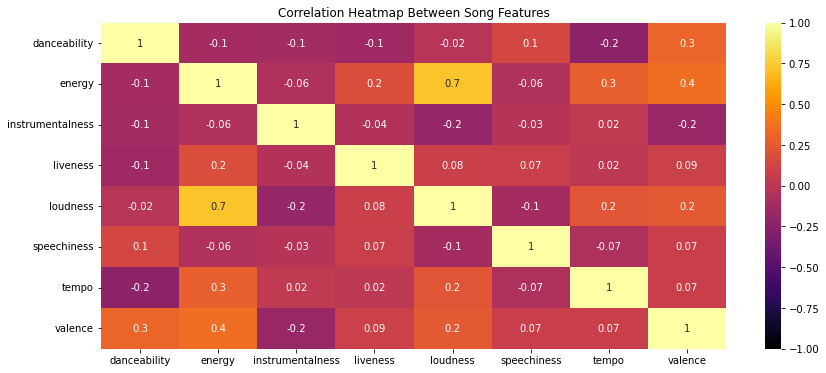

In [257]:
# Get the correlation values for all numerical columns
df_corr = df_track_feature.drop(["track_id", "type", "song_uri"],axis=1).corr(method="pearson")

# Set visualization size
plt.figure(figsize=(14,6))

# Define visualization
corr_visual = sns.heatmap(df_corr, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno")

corr_visual.set_title("Correlation Heatmap Between Song Features")

The above visualization is a heatmap which has the r value describing the correlation between all numerical track features. In this case, perfect positive correlation is light yellow and negative correlation is black. As expected, each feature is positively correlated with itself. 
<br>
<br>
Most values have little to no correlation with each other, but there is a strong correlation between energy and loudness. This makes since because one can imagine that a louder song can make it feel more energetic. There is also some correlation between tempo and energy as well.
<br>
<br>
The following visualization complements the previous one. It gives a visual depiction of the correlation, while the above gives a numerical value to the correlation.

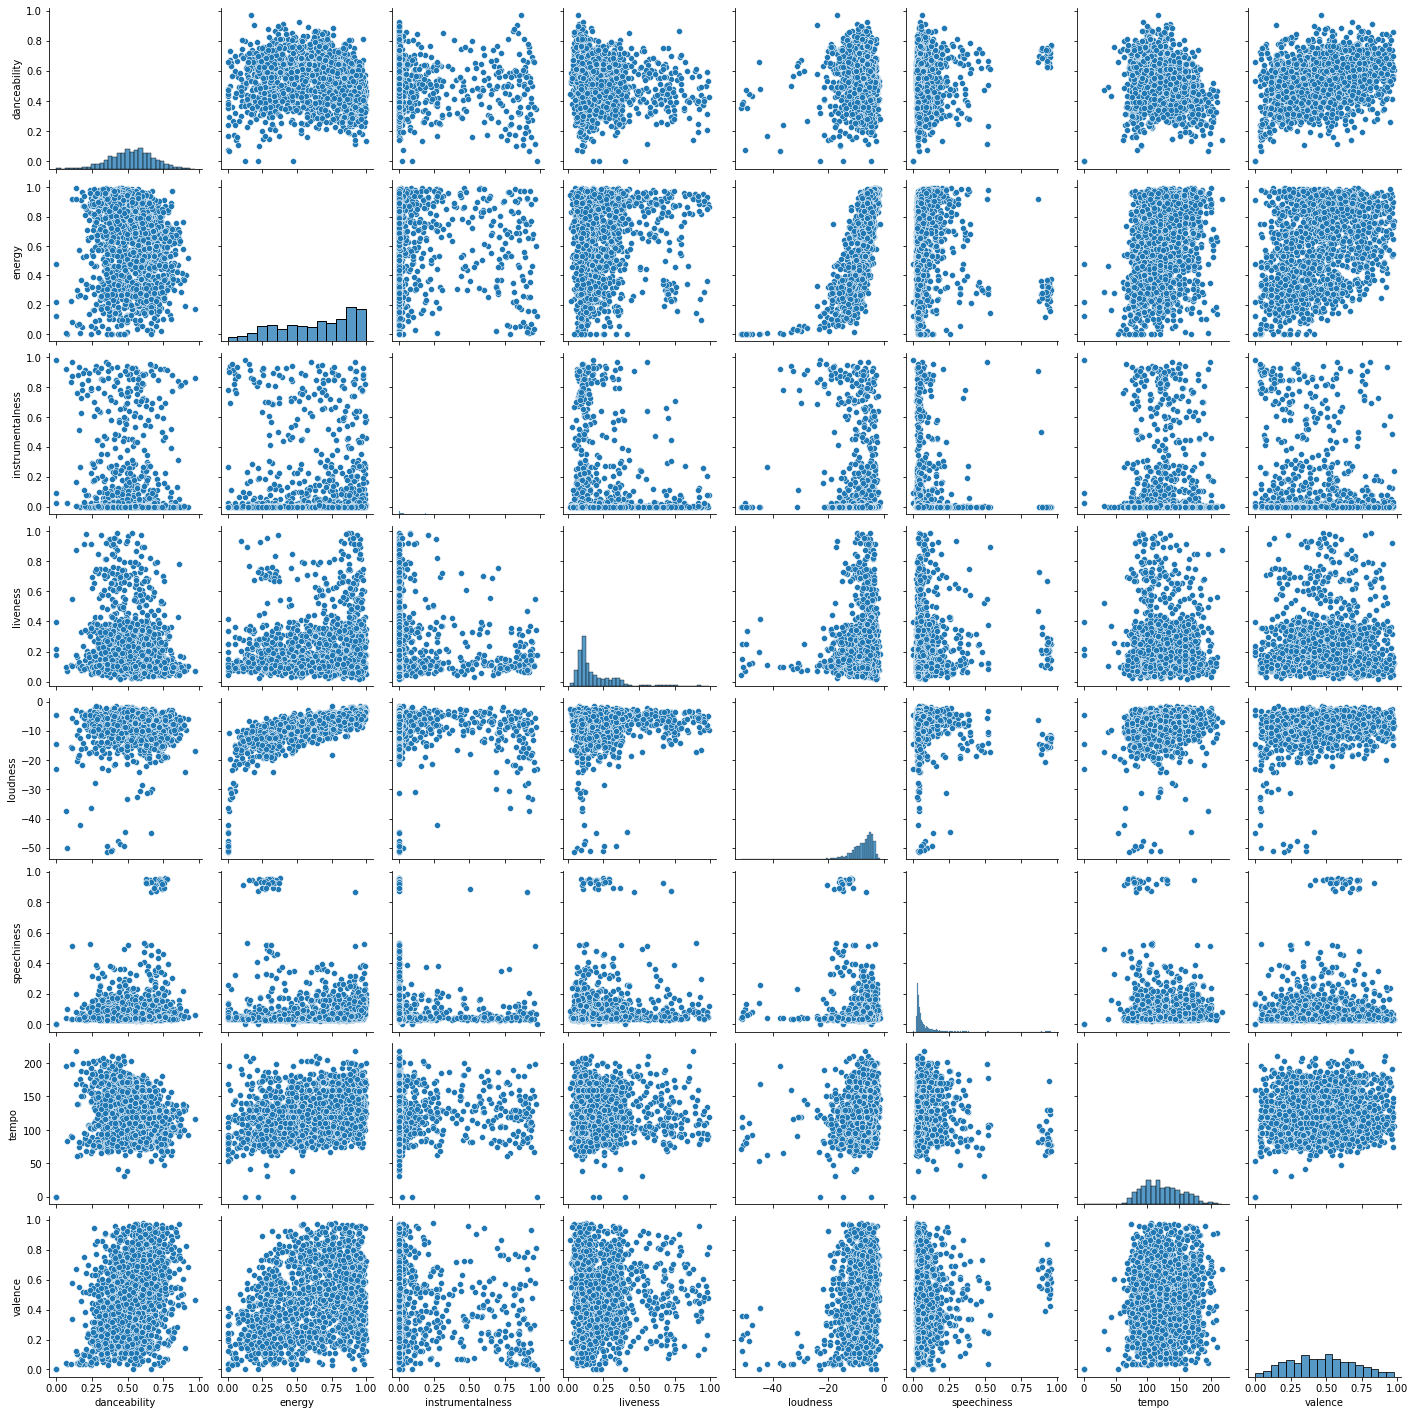

In [258]:
# a sumbset of the track features with only the numerical data
df_tf_num = df_track_feature_nodup[['danceability', 'energy', 
                               'instrumentalness', 'liveness', 'loudness', 
                               'speechiness', 'tempo', 'valence']]

# using pairplot from the seaborn package, there might be correlations between some of the features that will be revealed

sns.pairplot(data = df_tf_num, palette = 'mako')



## 7.2 Visualization 2




In [10]:
database = r"db_files\spotify.db"

conn = sqlite3.connect(database)

viz_query = ("""
    SELECT a.artist_name
    , tf.danceability
    , tf.energy
    , tf.instrumentalness
    , tf.liveness
    , tf.loudness
    , tf.speechiness
    , tf.tempo
    , tf.valence
    FROM artist AS a
    JOIN album AS al
        ON a.artist_id = al.artist_id
    JOIN track AS t
        ON al.album_id = t.album_id
    JOIN track_feature AS tf
        ON t.track_id = tf.track_id
    """)
art_album = pd.read_sql(viz_query, conn)
art_album.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       1930 non-null   object 
 1   danceability      1930 non-null   float64
 2   energy            1930 non-null   float64
 3   instrumentalness  1930 non-null   float64
 4   liveness          1930 non-null   float64
 5   loudness          1930 non-null   float64
 6   speechiness       1930 non-null   float64
 7   tempo             1930 non-null   float64
 8   valence           1930 non-null   float64
dtypes: float64(8), object(1)
memory usage: 135.8+ KB


<Figure size 800x480 with 0 Axes>

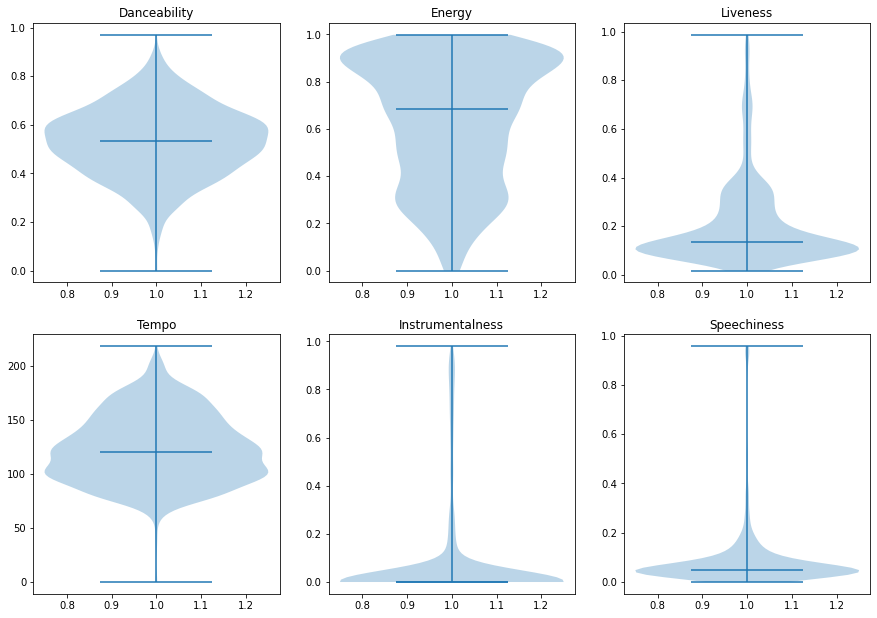

In [11]:

figure(figsize=(10, 6), dpi=80)
 
# Create figure with three axes
fig, ([ax1, ax2, ax3], [ax4, ax5, ax6]) = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(15, 10.5)
# Plot violin plot on axes 1
ax1.violinplot(art_album.danceability, showmedians=True)
ax1.set_title('Danceability')

# Plot violin plot on axes 2
ax2.violinplot(art_album.energy, showmedians=True)
ax2.set_title('Energy')

# Plot violin plot on axes 3
ax3.violinplot(art_album.liveness, showmedians=True)
ax3.set_title('Liveness')

# Plot violin plot on axes 3
ax4.violinplot(art_album.tempo, showmedians=True)
ax4.set_title('Tempo')

# Plot violin plot on axes 3
ax5.violinplot(art_album.instrumentalness, showmedians=True)
ax5.set_title('Instrumentalness')

# Plot violin plot on axes 3
ax6.violinplot(art_album.speechiness, showmedians=True)
ax6.set_title('Speechiness')

plt.show()

Some of the features have a typical normal apearence in their distribution, but the features Instrumentalness and Speechiness are very concentrated on the lower end of the scale with outliers on the top of the scale. There are likely a few intramental tracks and atleast one track that is with little supporting music according to these distributions.

## 7.3 Trends Over Years
I am interested in seeing how different features trend over the years. 

In [12]:
avg_query = ("""
    SELECT al.release_date
    , avg(t.duration_ms)/60000 AS avg_duration_min
    , avg(tf.danceability) AS avg_dance
    , avg(tf.energy) AS avg_energy
    , avg(tf.liveness) AS avg_live
    , avg(tf.tempo) AS avg_tempo
    FROM album AS al
    JOIN track AS t
        ON al.album_id = t.album_id
    JOIN track_feature AS tf
        ON t.track_id = tf.track_id
    GROUP BY al.release_date
    """)

album_avg = pd.read_sql(avg_query, conn)
album_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   release_date      135 non-null    object 
 1   avg_duration_min  135 non-null    float64
 2   avg_dance         135 non-null    float64
 3   avg_energy        135 non-null    float64
 4   avg_live          135 non-null    float64
 5   avg_tempo         135 non-null    float64
dtypes: float64(5), object(1)
memory usage: 6.5+ KB


In [13]:
album_avg['year'] = pd.DatetimeIndex(album_avg['release_date']).year

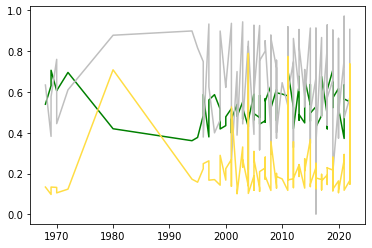

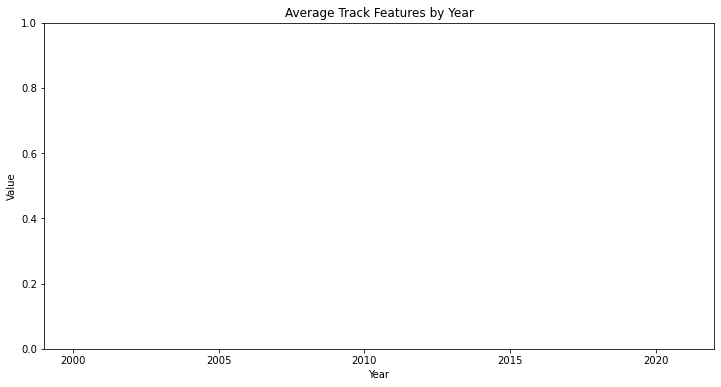

In [19]:
# plt.plot(album_avg['year'], album_avg['avg_duration_min'], color='blue')        
# Track Feature Line Plots
plt.plot(album_avg['year'], album_avg['avg_dance'], color='g')           
plt.plot(album_avg['year'], album_avg['avg_energy'], color='0.75')       
plt.plot(album_avg['year'], album_avg['avg_live'], color='#FFDD44') 

fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Average Track Features by Year')
plt.xlabel("Year")
plt.ylabel("Value")
plt.xlim([1999, 2022])
plt.show()

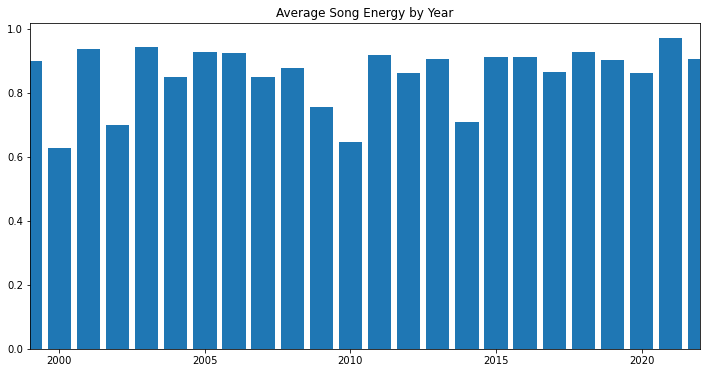

In [265]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(album_avg['year'], album_avg['avg_energy'])

plt.title('Average Song Energy by Year')
plt.xlim([1999, 2022])
plt.show()

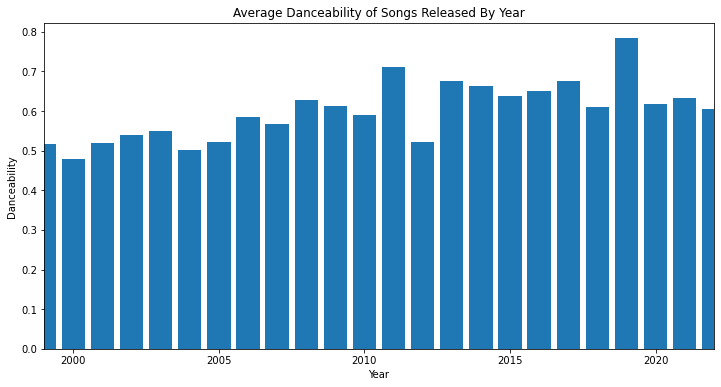

In [266]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(album_avg['year'], album_avg['avg_dance'])

plt.title('Average Danceability of Songs Released By Year')
plt.xlabel("Year")
plt.ylabel("Danceability")
plt.xlim([1999, 2022])
plt.show()

In [267]:
avg_query = ("""
    SELECT al.release_date
    , tf.danceability
    FROM album AS al
    JOIN track AS t
        ON al.album_id = t.album_id
    JOIN track_feature AS tf
        ON t.track_id = tf.track_id
    """)

dance_year = pd.read_sql(avg_query, conn)

dance_year['year'] = pd.DatetimeIndex(dance_year['release_date']).year
dance_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   release_date  1930 non-null   object 
 1   danceability  1930 non-null   float64
 2   year          1930 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 45.4+ KB


In [268]:
dance_year_2018 = dance_year[dance_year['year'] == 2018]
dance_year_2019 = dance_year[dance_year['year'] == 2019]
dance_year_2020 = dance_year[dance_year['year'] == 2020]

In [269]:
dance_year_2019.describe()

,danceability,year
count,92.000000,92.0
mean,0.623873,2019.0
std,0.174231,0.0
min,0.071300,2019.0
25%,0.536500,2019.0
50%,0.631000,2019.0
75%,0.749250,2019.0
max,0.970000,2019.0


In [270]:
dance_year_2020.describe()

,danceability,year
count,102.000000,102.0
mean,0.560098,2020.0
std,0.122760,0.0
min,0.234000,2020.0
25%,0.497750,2020.0
50%,0.564000,2020.0
75%,0.652500,2020.0
max,0.803000,2020.0


In [271]:
dance_year_2018.describe()

,danceability,year
count,83.000000,83.0
mean,0.538145,2018.0
std,0.133777,0.0
min,0.229000,2018.0
25%,0.429000,2018.0
50%,0.546000,2018.0
75%,0.640000,2018.0
max,0.781000,2018.0


In the year 2019 danceability was 0.611063 +- 0.168095 for 84 tracks.
<br>
In the year 2020 danceability was 0.560163 +- 0.125468 for 49 tracks.
<br>
<br>
The p valued between the years of 2019 and 2020 are 0.6429 and 0.0306. The drop between the years of 2019 and 2020 are statistically different. It is interesting to see how major world events like a global pandemic can impact the music we listen to!

Checking to see if there are any trends between popularity and track features.

In [261]:
avg_query = ("""
    SELECT a.artist_name
    , a.followers
    , a.popularity
    , avg(t.duration_ms)/60000 AS avg_duration_min
    , avg(tf.danceability) AS avg_dance
    , avg(tf.energy) AS avg_energy
    , avg(tf.liveness) AS avg_live
    , avg(tf.tempo) AS avg_tempo
    FROM artist AS a
    JOIN album AS al
        ON a.artist_id = al.artist_id
    JOIN track AS t
        ON al.album_id = t.album_id
    JOIN track_feature AS tf
        ON t.track_id = tf.track_id
    GROUP BY a.artist_name
    """)

artist_avg = pd.read_sql(avg_query, conn)
artist_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       20 non-null     object 
 1   followers         20 non-null     int64  
 2   popularity        20 non-null     int64  
 3   avg_duration_min  20 non-null     float64
 4   avg_dance         20 non-null     float64
 5   avg_energy        20 non-null     float64
 6   avg_live          20 non-null     float64
 7   avg_tempo         20 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 1.4+ KB


Text(0.5, 1.0, 'Correlation Heatmap Between Song Features')

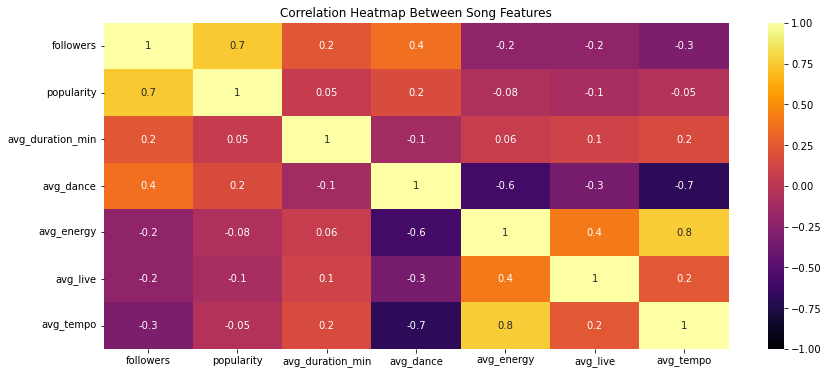

In [262]:
# Get the correlation values for all numerical columns
df_corr_pop = artist_avg.drop(["artist_name"],axis=1).corr(method="pearson")

# Set visualization size
plt.figure(figsize=(14,6))

# Define visualization
corr_pop_visual = sns.heatmap(df_corr_pop, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno")

corr_pop_visual.set_title("Correlation Heatmap Between Song Features")